# Problem statement


 EDA Analysis of Car93 Data

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

# Reading dataset

In [2]:
import pandas as pd
A=pd.read_csv("C:/Users/Admin/Desktop/ETL class/machine learning/13-08-2022(Logistic regression)/Cars93.csv")



pd.set_option('display.max_columns', None) # maximize the display value of column
pd.set_option('display.max_rows', None)

In [3]:
A.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Revpermile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


# Dropped Un-necessary columns

In [4]:
len(A.id.unique())

93

In [5]:
len(A.Model.unique())

93

In [6]:
len(A.Make.unique())

93

In [7]:
X= A.drop(labels=["id","Make","Model"],axis=1)

In [8]:
X.head()

,Manufacturer,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Revpermile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,Acura,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA
1,Acura,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA
2,Audi,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA
3,Audi,Midsize,30.8,37.7,44.6,19,26,NaN,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA
4,BMW,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA


# Missing Data Treatment

In [9]:
X.isna().sum()

Manufacturer           0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                4
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Revpermile             0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
dtype: int64

In [10]:
from PM8wd import replacer
replacer(X)

# Divide data in categorical and continuous

In [11]:
cat=[]
con=[]
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)    

In [12]:
cat

['Manufacturer',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin']

In [13]:
con

['Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Revpermile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room',
 'Weight']

# EDA

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# 1. Univariate Analysis

# 1.1 Univariate Analysis of continous columns

# Histogram

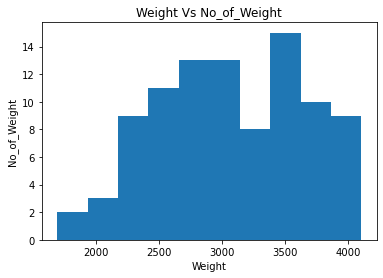

In [15]:
plt.hist(X.Weight)
plt.title("Weight Vs No_of_Weight")
plt.xlabel("Weight")
plt.ylabel("No_of_Weight")
plt.show()

# Distribution plot

<AxesSubplot:xlabel='Weight', ylabel='Density'>

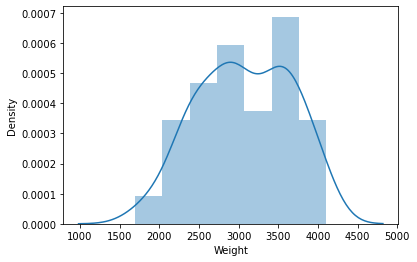

In [16]:
sb.distplot(X.Weight)

In [17]:
X.Weight.mean()

3072.9032258064517

In [18]:
X.Weight.median()

3040.0

In [19]:
X.Weight.skew()    #Right skew

-0.14366903828628688

# 1.2 Univariate of categorical columns

# pie chart

In [20]:
X.Type.value_counts()

Midsize    22
Small      21
Compact    16
Sporty     14
Large      11
Van         9
Name: Type, dtype: int64

<AxesSubplot:ylabel='Type'>

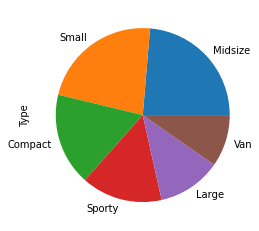

In [21]:
X.Type.value_counts().plot(kind="pie")                   #piechart

# Bar plot

In [22]:
X.Type.value_counts()

Midsize    22
Small      21
Compact    16
Sporty     14
Large      11
Van         9
Name: Type, dtype: int64

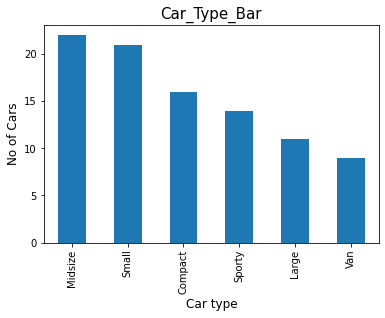

In [23]:
X.Type.value_counts().plot(kind="bar")
plt.title("Car_Type_Bar",fontsize=15)
plt.xlabel("Car type",fontsize=12)
plt.ylabel("No of Cars",fontsize=12)
plt.show()

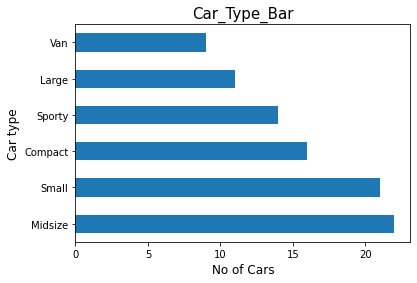

In [24]:
X.Type.value_counts().plot(kind="barh")
plt.title("Car_Type_Bar",fontsize=15)
plt.ylabel("Car type",fontsize=12)
plt.xlabel("No of Cars",fontsize=12)
plt.show()

# Multiple plots in one area

<AxesSubplot:xlabel='Origin', ylabel='count'>

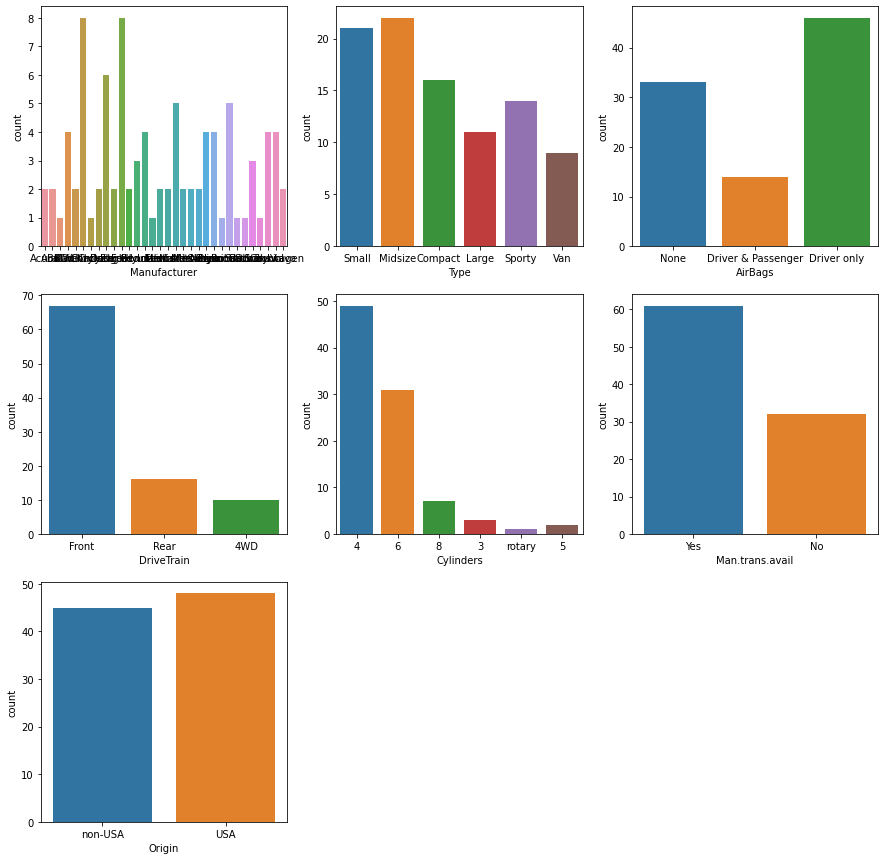

In [25]:
plt.figure(figsize=(15,15))

plt.subplot(3,3,1)
sb.countplot(X.Manufacturer)

plt.subplot(3,3,2)
sb.countplot(X.Type)

plt.subplot(3,3,3)
sb.countplot(X.AirBags)

plt.subplot(3,3,4)
sb.countplot(X.DriveTrain)

plt.subplot(3,3,5)
sb.countplot(X.Cylinders)

plt.subplot(3,3,6)
sb.countplot(X["Man.trans.avail"])

plt.subplot(3,3,7)
sb.countplot(X.Origin)

# 2.Bivariate Analysis

# 2.1 (Y-con,X-cat)

In [26]:
X.head()

,Manufacturer,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Revpermile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,Acura,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA
1,Acura,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA
2,Audi,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA
3,Audi,Midsize,30.8,37.7,44.6,19,26,Driver only,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA
4,BMW,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA


In [27]:
#Y=A[["Weight"]]

<AxesSubplot:xlabel='Origin', ylabel='Weight'>

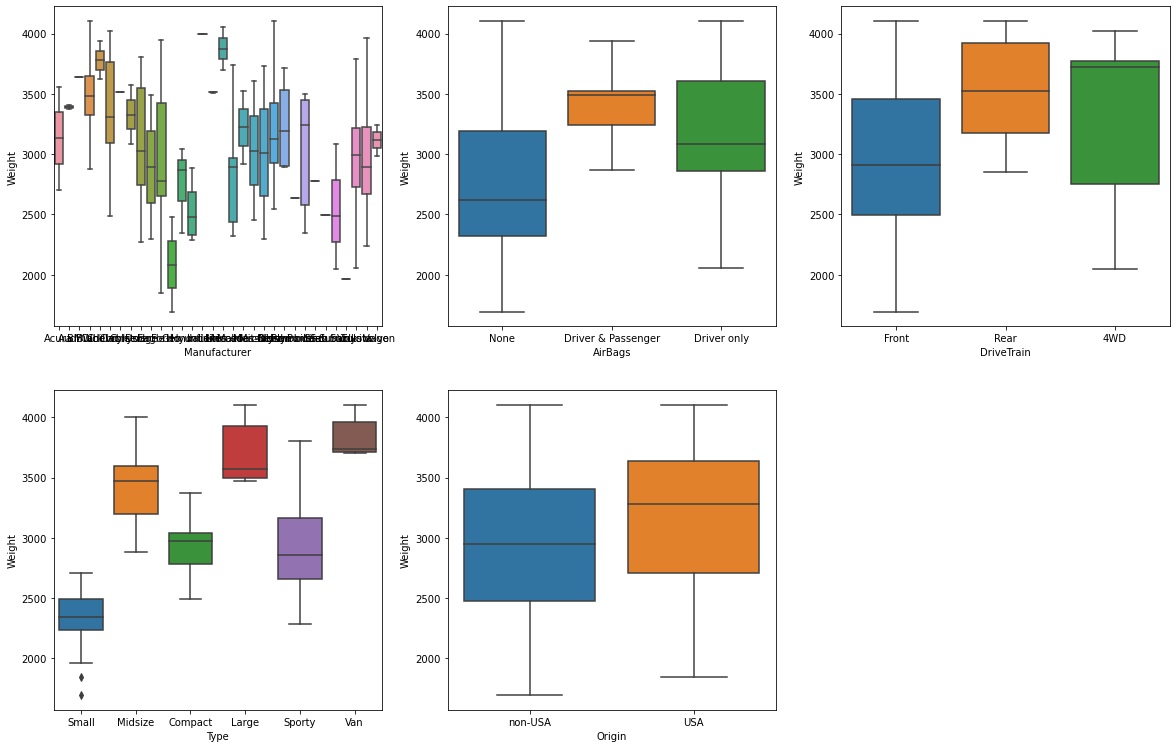

In [28]:
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))

plt.subplot(3,3,1)
sb.boxplot(X.Manufacturer,X.Weight)

plt.subplot(3,3,2)
sb.boxplot(X.AirBags,X.Weight)

plt.subplot(3,3,3)
sb.boxplot(X.DriveTrain,X.Weight)

plt.subplot(3,3,4)
sb.boxplot(X.Type,X.Weight)

plt.subplot(3,3,5)
sb.boxplot(X.Origin,X.Weight)

# 2.2 (X-con,Y-con)

In [29]:
X.corr()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Revpermile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
Min.Price,1.000000,0.970601,0.906756,-0.622875,-0.579966,0.645488,0.802444,-0.042598,-0.470395,0.635369,0.061236,0.553859,0.516758,0.492878,0.428603,0.361525,0.395783,0.666554
Price,0.970601,1.000000,0.981580,-0.594562,-0.560680,0.597425,0.788218,-0.004955,-0.426395,0.619480,0.057860,0.503628,0.500864,0.456028,0.392590,0.301888,0.354635,0.647179
Max.Price,0.906756,0.981580,1.000000,-0.547811,-0.522561,0.535012,0.744445,0.025015,-0.374024,0.581294,0.053216,0.442933,0.467501,0.408414,0.347785,0.241600,0.307020,0.605142
MPG.city,-0.622875,-0.594562,-0.547811,1.000000,0.943936,-0.710003,-0.672636,0.363045,0.695857,-0.813144,-0.416856,-0.666239,-0.667108,-0.720534,-0.666389,-0.380435,-0.462204,-0.843139
MPG.highway,-0.579966,-0.560680,-0.522561,0.943936,1.000000,-0.626795,-0.619044,0.313469,0.587497,-0.786039,-0.466386,-0.542897,-0.615384,-0.640359,-0.593683,-0.364284,-0.327732,-0.810658
EngineSize,0.645488,0.597425,0.535012,-0.710003,-0.626795,1.000000,0.732120,-0.547898,-0.824009,0.759306,0.372721,0.780283,0.732484,0.867110,0.778464,0.473740,0.618326,0.845075
Horsepower,0.802444,0.788218,0.744445,-0.672636,-0.619044,0.732120,1.000000,0.036688,-0.600314,0.711790,0.009264,0.550865,0.486854,0.644413,0.561216,0.236871,0.328568,0.738798
RPM,-0.042598,-0.004955,0.025015,0.363045,0.313469,-0.547898,0.036688,1.000000,0.494764,-0.333345,-0.467138,-0.441249,-0.467812,-0.539721,-0.505651,-0.333847,-0.481744,-0.427931
Revpermile,-0.470395,-0.426395,-0.374024,0.695857,0.587497,-0.824009,-0.600314,0.494764,1.000000,-0.609710,-0.334976,-0.690233,-0.636824,-0.780460,-0.733160,-0.370410,-0.557095,-0.735264
Fuel.tank.capacity,0.635369,0.619480,0.581294,-0.813144,-0.786039,0.759306,0.711790,-0.333345,-0.609710,1.000000,0.472095,0.690461,0.757674,0.798719,0.671343,0.503797,0.528362,0.894018


<AxesSubplot:xlabel='Weight', ylabel='Turn.circle'>

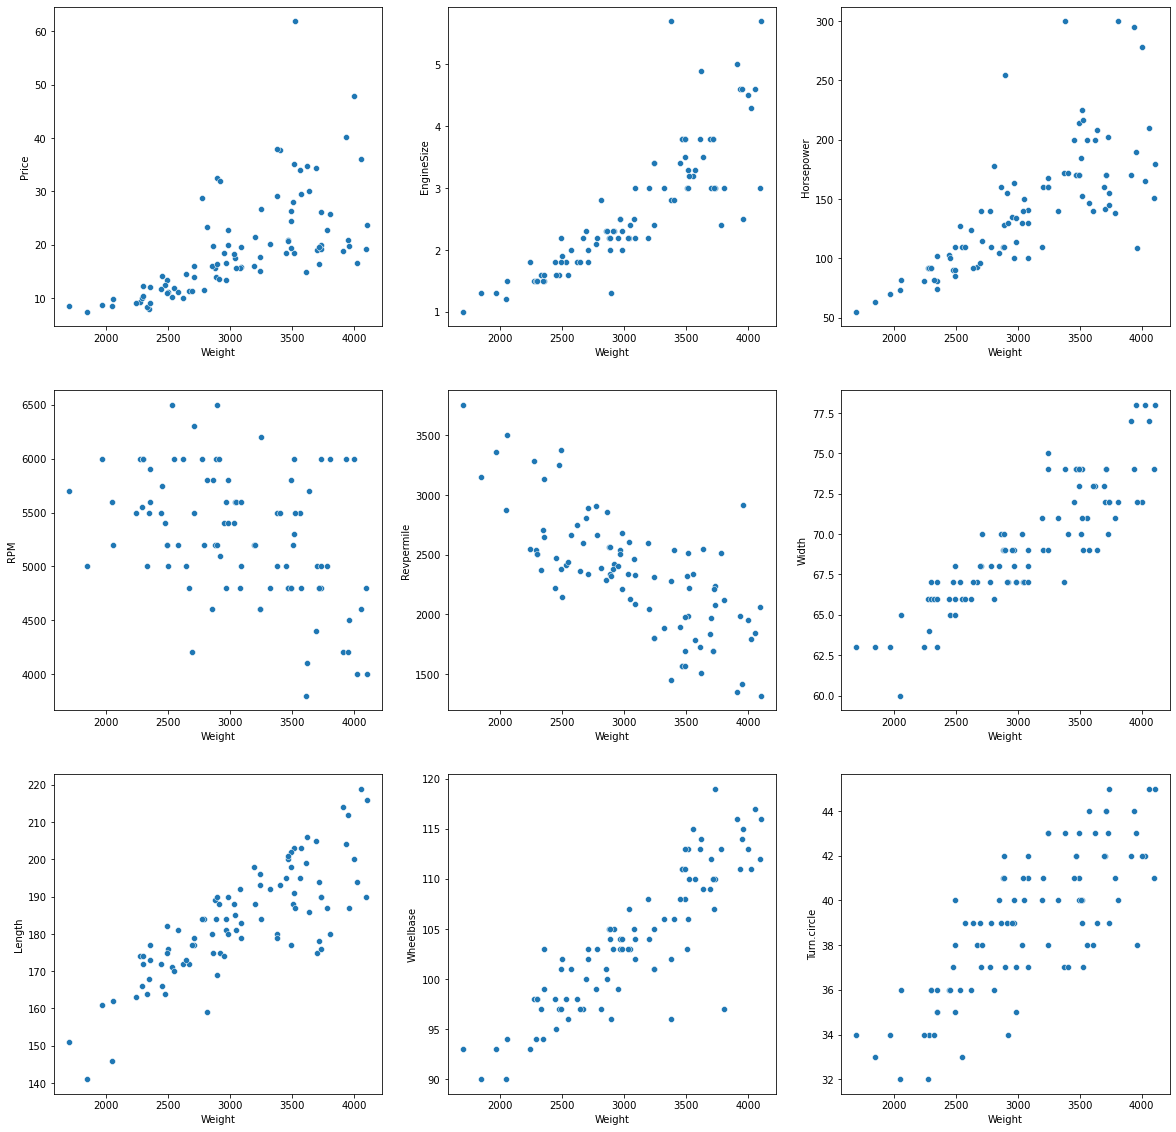

In [30]:
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))

plt.subplot(3,3,1)
sb.scatterplot(X.Weight,X.Price)

plt.subplot(3,3,2)
sb.scatterplot(X.Weight,X.EngineSize)

plt.subplot(3,3,3)
sb.scatterplot(X.Weight,X.Horsepower)

plt.subplot(3,3,4)
sb.scatterplot(X.Weight,X.RPM)

plt.subplot(3,3,5)
sb.scatterplot(X.Weight,X.Revpermile)

plt.subplot(3,3,6)
sb.scatterplot(X.Weight,X.Width)

plt.subplot(3,3,7)
sb.scatterplot(X.Weight,X.Length)

plt.subplot(3,3,8)
sb.scatterplot(X.Weight,X.Wheelbase)

plt.subplot(3,3,9)
sb.scatterplot(X.Weight,X["Turn.circle"])